# Titanic Survival Prediction
#### This is a classic beginner project with readily available data. that predicts whether a passenger on the Titanic survived or not.
#### The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='lbfgs', max_iter=3000)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


# Loading The Dataset

In [16]:
data= pd.read_csv('tested.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Preprocessing
#### (checking null value)

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Visualizing The Missing Value.

<Axes: >

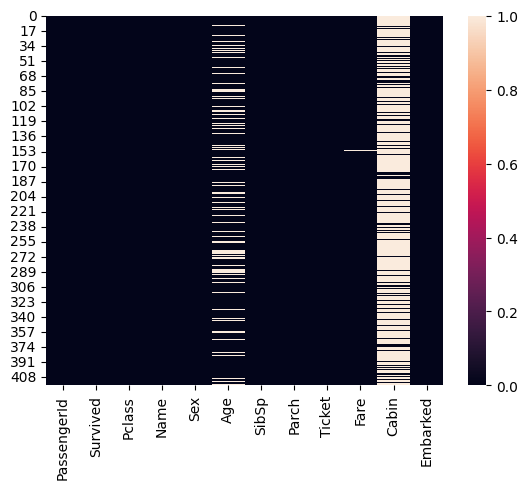

In [4]:
sns.heatmap(data.isna())

Filling the missing values for 'Age' and 'Fare', but won't fill 'Cabin' due to over 30% missing data. Features with >30% missing data will be dropped from the dataset.

# Filling the missing value by its mean

In [17]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

# Verify Missing Value



<Axes: >

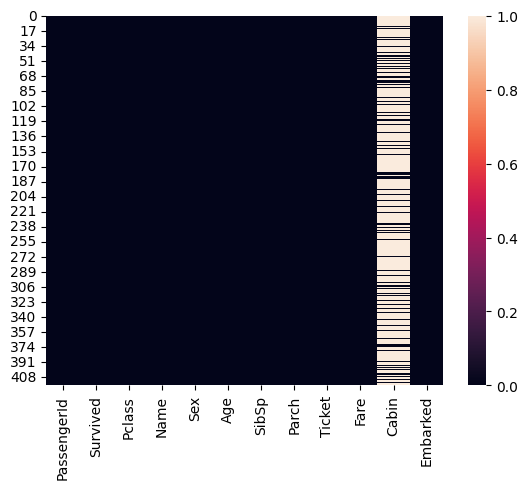

In [6]:
sns.heatmap(data.isna())

# Checking Data Type Of Features

In [18]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
gender=pd.get_dummies(data['Sex'],drop_first=True)

data['Gender']=gender
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
 12  Gender       418 non-null    uint8  
dtypes: float64(2), int64(5), object(5), uint8(1)
memory usage: 39.7+ KB


# Dropping irrelevant columns and verifying changes

In [21]:
data.drop(['Name','Sex','Ticket','Embarked','Cabin'], axis=1, inplace=True)

data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,0,3,34.5,0,0,7.8292,1
1,893,1,3,47.0,1,0,7.0000,0
2,894,0,2,62.0,0,0,9.6875,1
3,895,0,3,27.0,0,0,8.6625,1
4,896,1,3,22.0,1,1,12.2875,0


# Data Modeling

In [22]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Fitting in Logistic Regression

In [32]:
LR.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

# Making predictions using confusion matrix

In [34]:
y_pred=LR.predict(X_test)

pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,50,0
Actual Yes,0,34


# Evaluating the model

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

